In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import sklearn
print(sklearn.__version__)
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from google.colab import files
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

1.2.2


List of libraries used in building the prediction models

In [ ]:
df = pd.read_csv('/content/Fifa 23 Players Data.csv')
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


 This step reads our dataset named "Fifa 23 Players Data.csv" into a pandas DataFrame named 'df and print out the first 5 rows in the dataset



DATA CLEANING

In [ ]:
df.columns = df.columns.str.upper()

This step changes all column names in the DataFrame 'df' to uppercase letters, effectively converting them to uppercase

In [ ]:
df.columns

Index(['KNOWN AS', 'FULL NAME', 'OVERALL', 'POTENTIAL', 'VALUE(IN EURO)',
       'POSITIONS PLAYED', 'BEST POSITION', 'NATIONALITY', 'IMAGE LINK', 'AGE',
       'HEIGHT(IN CM)', 'WEIGHT(IN KG)', 'TOTALSTATS', 'BASESTATS',
       'CLUB NAME', 'WAGE(IN EURO)', 'RELEASE CLAUSE', 'CLUB POSITION',
       'CONTRACT UNTIL', 'CLUB JERSEY NUMBER', 'JOINED ON', 'ON LOAN',
       'PREFERRED FOOT', 'WEAK FOOT RATING', 'SKILL MOVES',
       'INTERNATIONAL REPUTATION', 'NATIONAL TEAM NAME',
       'NATIONAL TEAM IMAGE LINK', 'NATIONAL TEAM POSITION',
       'NATIONAL TEAM JERSEY NUMBER', 'ATTACKING WORK RATE',
       'DEFENSIVE WORK RATE', 'PACE TOTAL', 'SHOOTING TOTAL', 'PASSING TOTAL',
       'DRIBBLING TOTAL', 'DEFENDING TOTAL', 'PHYSICALITY TOTAL', 'CROSSING',
       'FINISHING', 'HEADING ACCURACY', 'SHORT PASSING', 'VOLLEYS',
       'DRIBBLING', 'CURVE', 'FREEKICK ACCURACY', 'LONGPASSING', 'BALLCONTROL',
       'ACCELERATION', 'SPRINT SPEED', 'AGILITY', 'REACTIONS', 'BALANCE',
       'SHOT POWE

In [ ]:
columns_to_remove = ['KNOWN AS', 'POSITIONS PLAYED', 'IMAGE LINK', 'TOTALSTATS', 'BASESTATS', 'CLUB JERSEY NUMBER', 'ON LOAN', 'NATIONAL TEAM IMAGE LINK', 'NATIONAL TEAM POSITION', 'NATIONAL TEAM JERSEY NUMBER', 'INTERNATIONAL REPUTATION', 'HEIGHT(IN CM)', 'WEIGHT(IN KG)','NATIONAL TEAM NAME']

df = df.drop(columns=columns_to_remove)

This step creates a list called 'columns_to_remove,' containing the names of specific columns to be removed from the DataFrame 'df' as they bear no importance in building the models, effectively excluding them from further analysis or processing

In [ ]:
df

,FULL NAME,OVERALL,POTENTIAL,VALUE(IN EURO),BEST POSITION,NATIONALITY,AGE,CLUB NAME,WAGE(IN EURO),RELEASE CLAUSE,...,LM RATING,CM RATING,RM RATING,LWB RATING,CDM RATING,RWB RATING,LB RATING,CB RATING,RB RATING,GK RATING
0,Lionel Messi,91,91,54000000,CAM,Argentina,35,Paris Saint-Germain,195000,99900000,...,91,88,91,67,66,67,62,53,62,22
1,Karim Benzema,91,91,64000000,CF,France,34,Real Madrid CF,450000,131199999,...,89,84,89,67,67,67,63,58,63,21
2,Robert Lewandowski,91,91,84000000,ST,Poland,33,FC Barcelona,420000,172200000,...,86,83,86,67,69,67,64,63,64,22
3,Kevin De Bruyne,91,91,107500000,CM,Belgium,31,Manchester City,350000,198900000,...,91,91,91,82,82,82,78,72,78,24
4,Kylian Mbappé,91,95,190500000,ST,France,23,Paris Saint-Germain,230000,366700000,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,Darren Collins,47,56,110000,CAM,Republic of Ireland,21,Sligo Rovers,500,193000,...,50,44,50,41,38,41,40,36,40,15
18535,Dejiang Yang,47,57,90000,CDM,China PR,17,Guangzhou FC,500,158000,...,45,45,45,47,48,47,49,49,49,15
18536,Liam Mullan,47,67,130000,RM,Northern Ireland,18,Derry City,500,332000,...,52,49,52,46,44,46,46,42,46,17
18537,Daithí McCallion,47,61,100000,CB,Republic of Ireland,17,Derry City,500,218000,...,33,33,33,44,42,44,47,49,47,15


In [ ]:
df.isnull().sum().sum()

0

This step provides the overall count of missing values across all columns in the DataFrame

In [ ]:
df.dropna(axis=0, inplace=True)

This step removes rows containing any missing (NaN) values in the DataFrame, his step acts a checking mechanism to search for any null values

In [ ]:
df.isnull().sum().sum()

0

This step provides the overall count of missing values across all columns after the previous step

In [ ]:
total_nan_count = df.isna().sum().sum()

In [ ]:
total_nan_count

0

These final steps in the data validation process yield a count of missing values, and in this case, the count is zero. It is generally considered ideal to have no missing values in your dataset when building prediction models.

CORRELATION HEATMAP

<ipython-input-12-e40a35a122f3>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


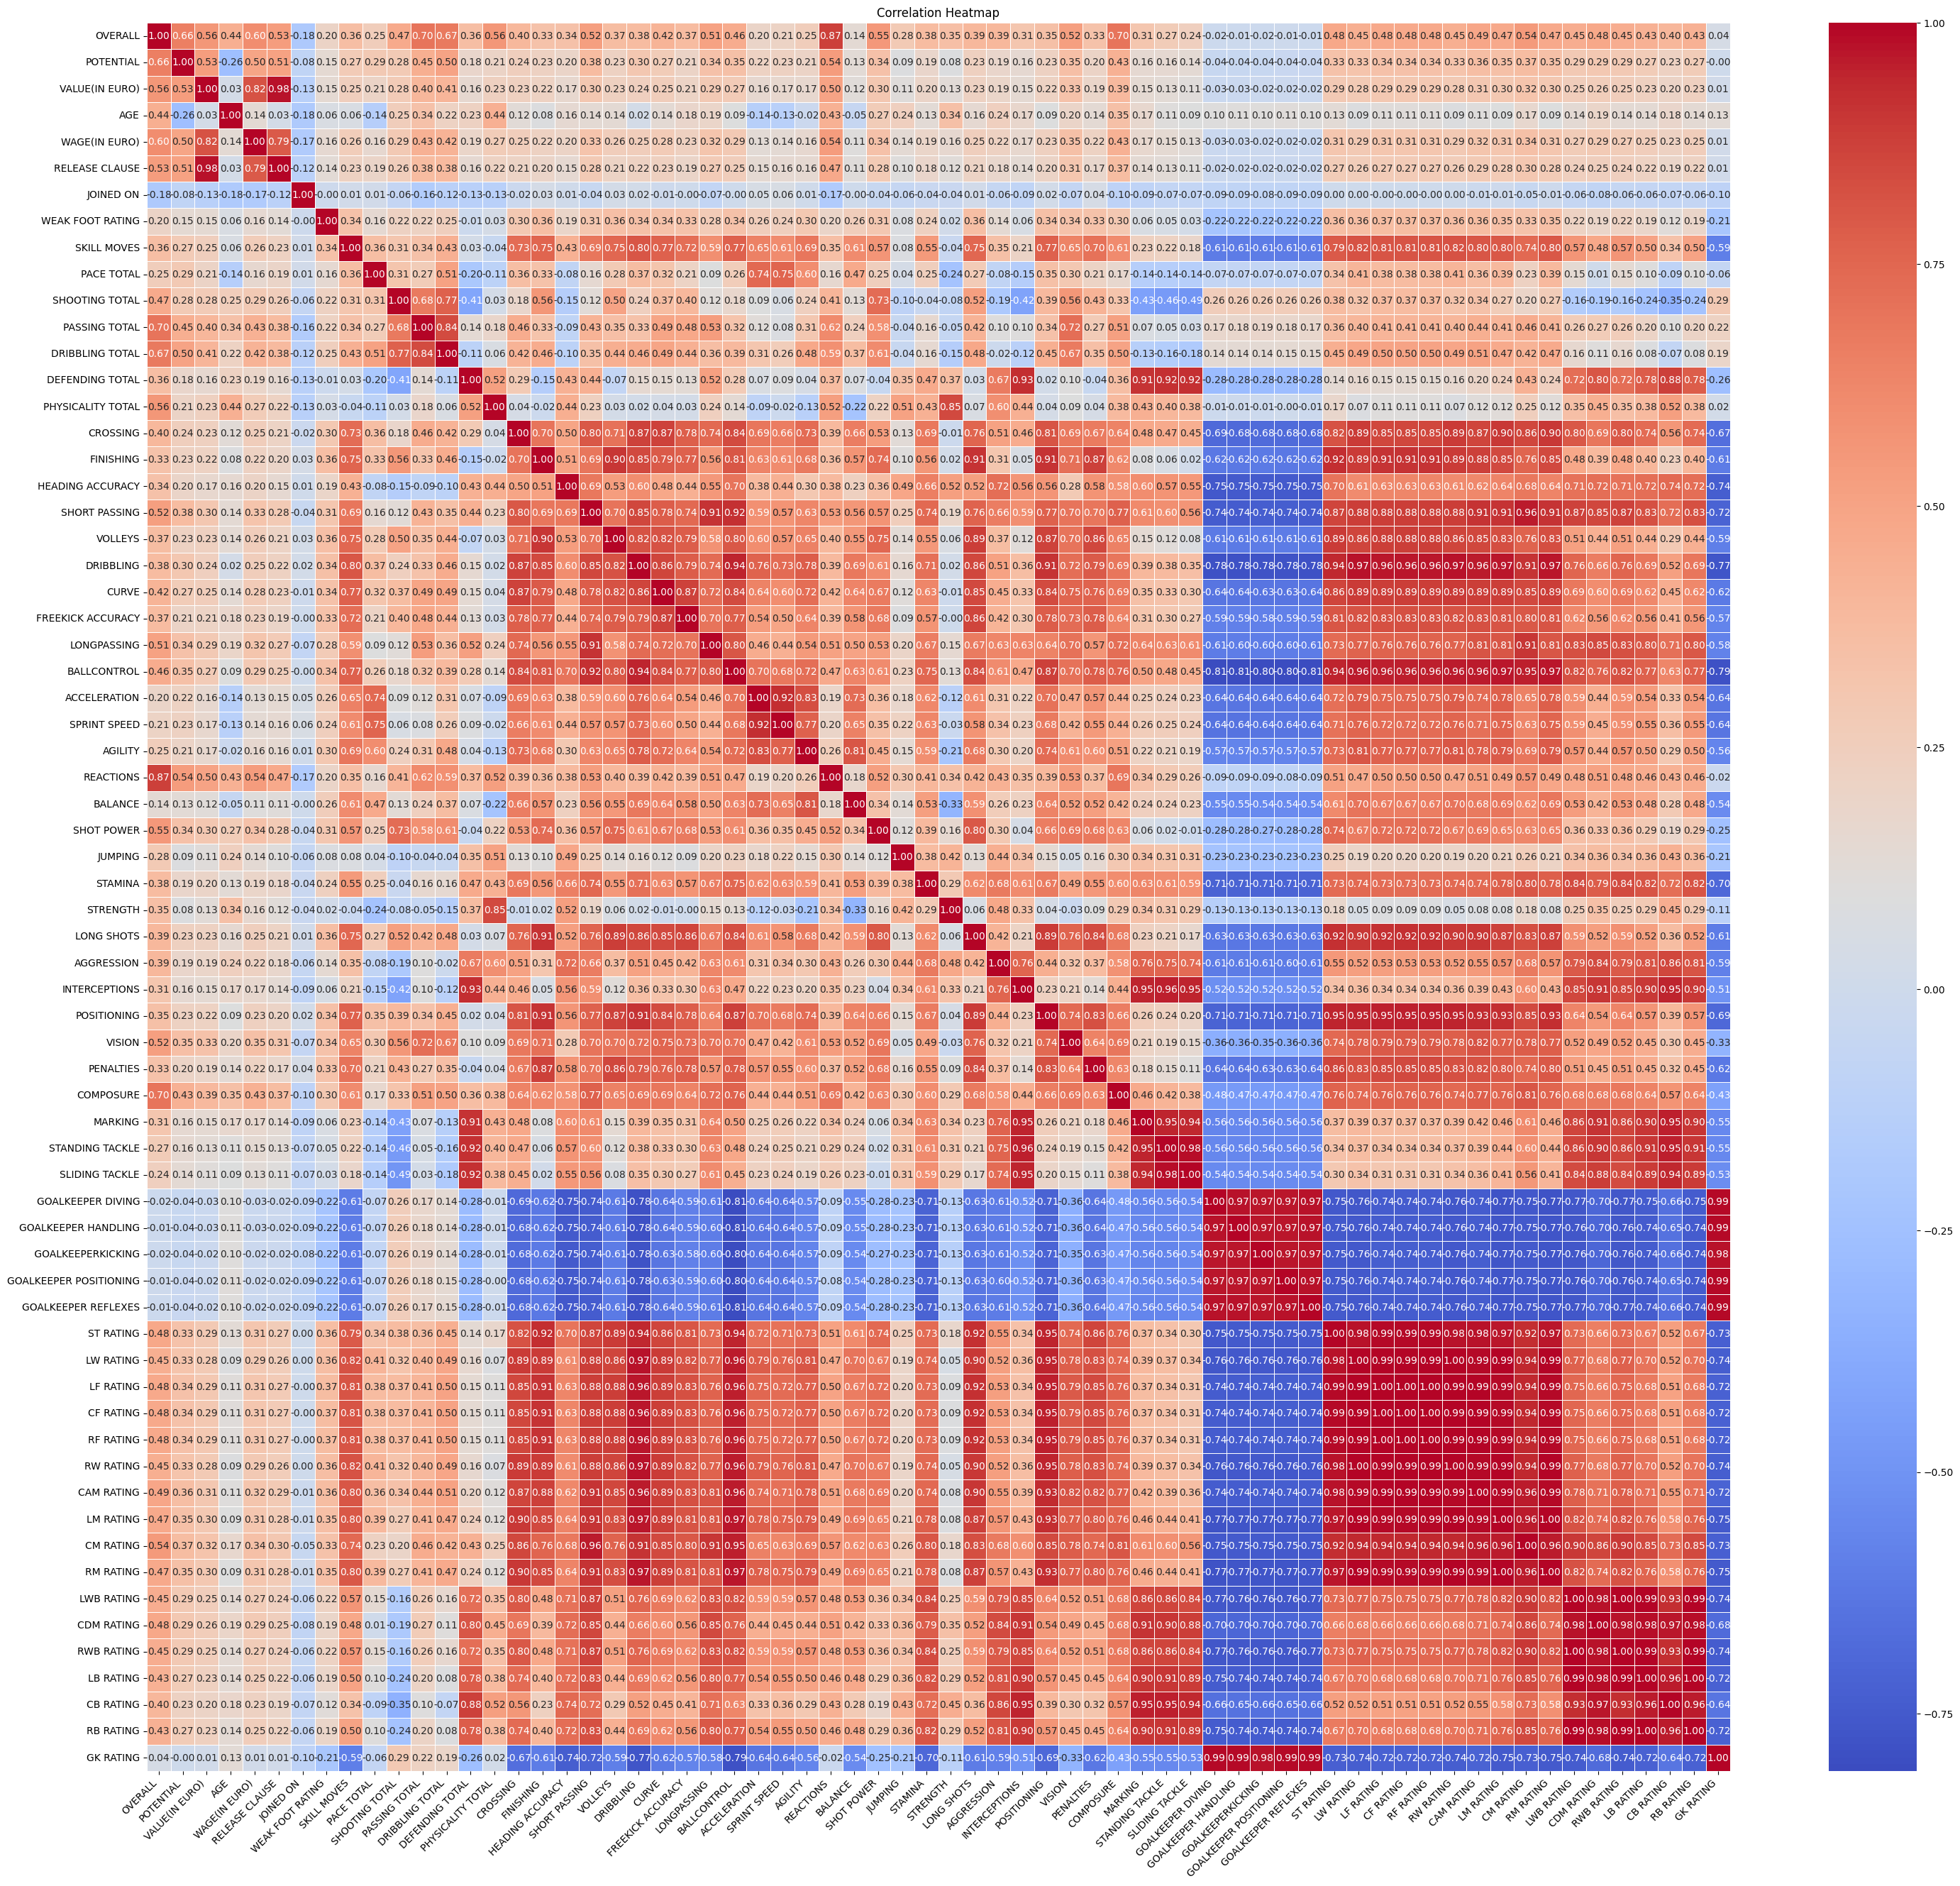

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df.corr()


plt.figure(figsize=(36, 32))


graph_8 = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 10})


graph_8.set_xticklabels(graph_8.get_xticklabels(), rotation=45, horizontalalignment='right')


plt.title('Correlation Heatmap')


plt.show()

**MODEL BUILDING**

**LINEAR REGRESSION**

In [ ]:
X = df[['OVERALL','VALUE(IN EURO)','WAGE(IN EURO)','RELEASE CLAUSE','PASSING TOTAL','DRIBBLING','REACTIONS']]
y = df['POTENTIAL']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [ ]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Absolute Error (MAE): 3.57007839435919
Mean Squared Error (MSE): 19.436358777423084
R-squared: 0.4922215906186186


**The result of the Linear Regression Model**

**K NEAREST NEIGHBORS REGRESSION**

In [ ]:
X1 = df[['OVERALL','VALUE(IN EURO)','WAGE(IN EURO)','RELEASE CLAUSE','PASSING TOTAL','DRIBBLING','REACTIONS']]
y1 = df['POTENTIAL']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [ ]:
model = KNeighborsRegressor()
model.fit(X1_train, y1_train)

KNeighborsRegressor()

In [ ]:
predictions = model.predict(X1_test)

In [ ]:
mae = mean_absolute_error(y1_test, predictions)
mse = mean_squared_error(y1_test, predictions)
r2 = r2_score(y1_test, predictions)

In [ ]:
print("K-Nearest Neighbors (KNN):")
print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r2)

K-Nearest Neighbors (KNN):
MAE: 1.8270046745774904
MSE: 6.321272923408846
R-squared: 0.8348555947607538


The result of the K NEAREST NEIGHBORS REGRESSION model

**SUPPORT VECTOR REGRESSION**

In [ ]:
X4 = df[['OVERALL','VALUE(IN EURO)','WAGE(IN EURO)','RELEASE CLAUSE','PASSING TOTAL','DRIBBLING','REACTIONS']]
y4 = df['POTENTIAL']

In [ ]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)

In [ ]:
model = SVR()
model.fit(X4_train, y4_train)

SVR()

In [ ]:
predictions = model.predict(X4_test)

In [ ]:
mae = mean_absolute_error(y4_test, predictions)
mse = mean_squared_error(y4_test, predictions)
r2 = r2_score(y4_test, predictions)

In [ ]:
print("Support Vector Regression (SVR):")
print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r2)

Support Vector Regression (SVR):
MAE: 2.7164085472909343
MSE: 12.98201131185874
R-squared: 0.6608425924837393


Result of Support Vector Regression

**GRADIENT BOOSTING REGRESSION**

In [ ]:
X5 = df[['OVERALL','VALUE(IN EURO)','WAGE(IN EURO)','RELEASE CLAUSE','PASSING TOTAL','DRIBBLING','REACTIONS']]
y5 = df['POTENTIAL']

In [ ]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=42)

In [ ]:
model = GradientBoostingRegressor()
model.fit(X5_train, y5_train)

GradientBoostingRegressor()

In [ ]:
predictions = model.predict(X5_test)

In [ ]:
mae = mean_absolute_error(y5_test, predictions)
mse = mean_squared_error(y5_test, predictions)
r2 = r2_score(y5_test, predictions)

In [ ]:
print("Gradient Boosting Regression:")
print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r2)

Gradient Boosting Regression:
MAE: 1.3129526051741134
MSE: 3.0161217621004583
R-squared: 0.9212032702010561


Result of Gradient Booster Regression

**RANDOM FOREST REGRESSION MODEL**

In [ ]:
X2 = df[['OVERALL','VALUE(IN EURO)','WAGE(IN EURO)','RELEASE CLAUSE','PASSING TOTAL','DRIBBLING','REACTIONS']]
y2 = df['POTENTIAL']

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [ ]:
model = RandomForestRegressor()
model.fit(X2_train, y2_train)

RandomForestRegressor()

In [ ]:
predictions = model.predict(X2_test)

In [ ]:
mae = mean_absolute_error(y2_test, predictions)
mse = mean_squared_error(y2_test, predictions)
r2 = r2_score(y2_test, predictions)

In [ ]:
print("Random Forest:")
print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r2)

Random Forest:
MAE: 0.6882056814095651
MSE: 1.2369011329357944
R-squared: 0.9676857328558


Result of the Random Forest Regression model

In [ ]:
data = [
    ["Model", "R Squared Values", "MAE", "MSE"],
    ["Linear Regression", 0.492, 3.57, 19.43],
    ["K Nearest Neighbors", 0.834, 1.82, 6.321],
    ["Support Vector Regression", 0.6608, 2.71, 12.98],
    ["Gradient Boosting Regression", 0.921, 1.31, 3.016],
    ["Random Forest Regression", 0.967, 0.68, 1.23],
]


column_widths = [max(len(str(row[i])) for row in data) for i in range(len(data[0]))]


format_string = " | ".join(["{{:<{}}}".format(width) for width in column_widths])


print(format_string.format(*data[0]))


for row in data[1:]:
    print(format_string.format(*row))

Model                        | R Squared Values | MAE  | MSE  
Linear Regression            | 0.492            | 3.57 | 19.43
K Nearest Neighbors          | 0.834            | 1.82 | 6.321
Support Vector Regression    | 0.6608           | 2.71 | 12.98
Gradient Boosting Regression | 0.921            | 1.31 | 3.016
Random Forest Regression     | 0.967            | 0.68 | 1.23 


In [ ]:

feature_importance = model.feature_importances_


feature_importance_list = [(feature_name, score) for feature_name, score in zip(X2.columns.tolist(), feature_importance)]


feature_importance_list.sort(key=lambda x: x[1], reverse=True)


print("Feature Importance Scores:")
for feature_name, score in feature_importance_list:
    print(f"{feature_name}: {score}")

Feature Importance Scores:
VALUE(IN EURO): 0.6776354553965896
OVERALL: 0.15846374032491187
RELEASE CLAUSE: 0.12854660533510173
DRIBBLING: 0.015258722616274317
WAGE(IN EURO): 0.007880933658899485
PASSING TOTAL: 0.006424766718338171
REACTIONS: 0.005789775949884901


The pivotal features that significantly contribute to achieving the highest accuracy scores among all the models

In [ ]:

player_table = X2_test.reset_index(drop=True)
player_table['FULL NAME'] = df.loc[X2_test.index, 'FULL NAME']
player_table['Actual POTENTIAL'] = y2_test.values
player_table['Predicted POTENTIAL'] = predictions


player_table = player_table.dropna(subset=['FULL NAME'])

print(player_table[['FULL NAME', 'Actual POTENTIAL', 'Predicted POTENTIAL']])

                           FULL NAME  Actual POTENTIAL  Predicted POTENTIAL
0                       Lionel Messi                75                74.57
3                    Kevin De Bruyne                81                81.84
5                      Mohamed Salah                66                66.00
8       C. Ronaldo dos Santos Aveiro                72                69.67
14                         Jan Oblak                73                73.30
...                              ...               ...                  ...
5548                     Joseph Lopy                78                77.06
5549              Mads Bech Sørensen                83                80.31
5550  Bruno Luiz Fagundeiro Cardenas                65                65.02
5553                     Mirko Marić                66                68.40
5561                 Antoine Bernier                75                74.65

[1646 rows x 3 columns]


The provided code illustrates the comparison between ACTUAL and PREDICTED POTENTIAL values for the players using a Random Forest Regression model.

In [ ]:

specific_player = player_table[player_table['FULL NAME'] == 'Lionel Messi']


print("Actual POTENTIAL for Lionel Messi:", specific_player['Actual POTENTIAL'].values[0])
print("Predicted POTENTIAL for Lionel Messi:", specific_player['Predicted POTENTIAL'].values[0])

Actual POTENTIAL for Lionel Messi: 75
Predicted POTENTIAL for Lionel Messi: 74.57


This process can be applied to select an individual player  and then analyze and contrast their actual and predicted values.